<a href="https://colab.research.google.com/github/atanilson/Comp702_Final/blob/main/Comp702_EvaluatingResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geeting Files from GIt HUB

Geeting the files from the github repository

In [1]:
%%capture
!mkdir scripts
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/get_data.py
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/CNN_Model1.py
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/data_setup.py
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/engine.py
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/Main_script.py
!wget https://raw.githubusercontent.com/atanilson/Comp702/refs/heads/main/scripts/utils.py
!mv get_data.py CNN_Model1.py data_setup.py engine.py Main_script.py utils.py scripts/
#!unzip scripts.zip

# Libraries

In [2]:
import os
import torch
from scripts import data_setup, engine, utils, get_data
from timeit import default_timer as timer

from torchvision import transforms

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device

'cuda'

In [ ]:
#!nvidia-smi

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Getting Data

In [5]:
get_data.download()

In [6]:
# Setup hyperparameters
NUM_EPOCHS = 150
BATCH_SIZE = 32
TEST_SPLIT = 0.2
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001

# Setup directories
data_dir = "data/EuroSAT_RGB"

size_cut = 224

# Create tranforms Train
transform_train = transforms.Compose([
    transforms.Resize(size_cut),
    transforms.RandomResizedCrop(size_cut),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    #transforms.RandomHorizontalFlip(),
    #****transforms.RandomRotation(10),
    #transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create tranforms test
transform_test = transforms.Compose([
    transforms.Resize(size_cut),
    transforms.CenterCrop(size_cut),
    #transforms.RandomHorizontalFlip(),
    #****transforms.RandomRotation(10),
    #transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


## Test transform onlr resise and normilize


# Create dataloaders
train_dataset, test_dataset, train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders_dataset(dataset_dir="data/EuroSAT_RGB",
                                                                               train_transform=transform_train,
                                                                               test_transform=transform_test,
                                                                               batch_size=BATCH_SIZE,
                                                                               test_split = TEST_SPLIT,
                                                                               #random_seed = 42,
                                                                               #num_workers = 1
                                                                               )




# Loading Model

Loading M2-ResNet

In [8]:
from torchvision.models import resnet50, ResNet50_Weights
from scripts import CNN_Model1
from torch import nn



path_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/Retrained/RESNET50_0001_SDG-RGB_B32_WW_EP150_S224.pth"
#path_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/RESNET50_RGB.pth"



model_2 = resnet50(weights=None)
model_2.fc = torch.nn.Linear(in_features=model_2.fc.in_features, out_features=len(class_names))
model_2.load_state_dict(torch.load(f=path_drive, map_location=device))
model_2 = model_2.to(device)


In [7]:
"""

path_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/Retrained/MODEL1_0001_SDG-RGB_B32_WW_EP250_S64_WAug.pth"
#path_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/MODEL_1_RGB224.pth"

from scripts import CNN_Model1

model_2 = CNN_Model1.CNN_Model1(
    input_shape=3,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

model_2.load_state_dict(torch.load(f=path_drive, map_location=device))
"""

'\n\npath_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/Retrained/MODEL1_0001_SDG-RGB_B32_WW_EP250_S64_WAug.pth"\n#path_drive = "./drive/MyDrive/Colab Notebooks/Comp702/Models/MODEL_1_RGB224.pth"\n\nfrom scripts import CNN_Model1\n\nmodel_2 = CNN_Model1.CNN_Model1(\n    input_shape=3,\n    hidden_units=10,\n    output_shape=len(class_names)\n).to(device)\n\nmodel_2.load_state_dict(torch.load(f=path_drive, map_location=device))\n'

# Loading Results

In [ ]:
save_dir = "./drive/My Drive/Colab Notebooks/Comp702/Models/"

In [ ]:
import pandas as pd

In [ ]:
#RetrainedMODEL_1_RGB_SDG_0_001
#RetrainedMODEL_1_RGB_ADAM_0_001
#RetrainedMODEL_1_RGB_ADAMmmmm_0_001

#RetrainedRESNET50_RGB_B32_SDG_0_001

results_df = pd.read_csv(save_dir+'RetrainedMODEL_1_RGB_SDG_0_001.csv')

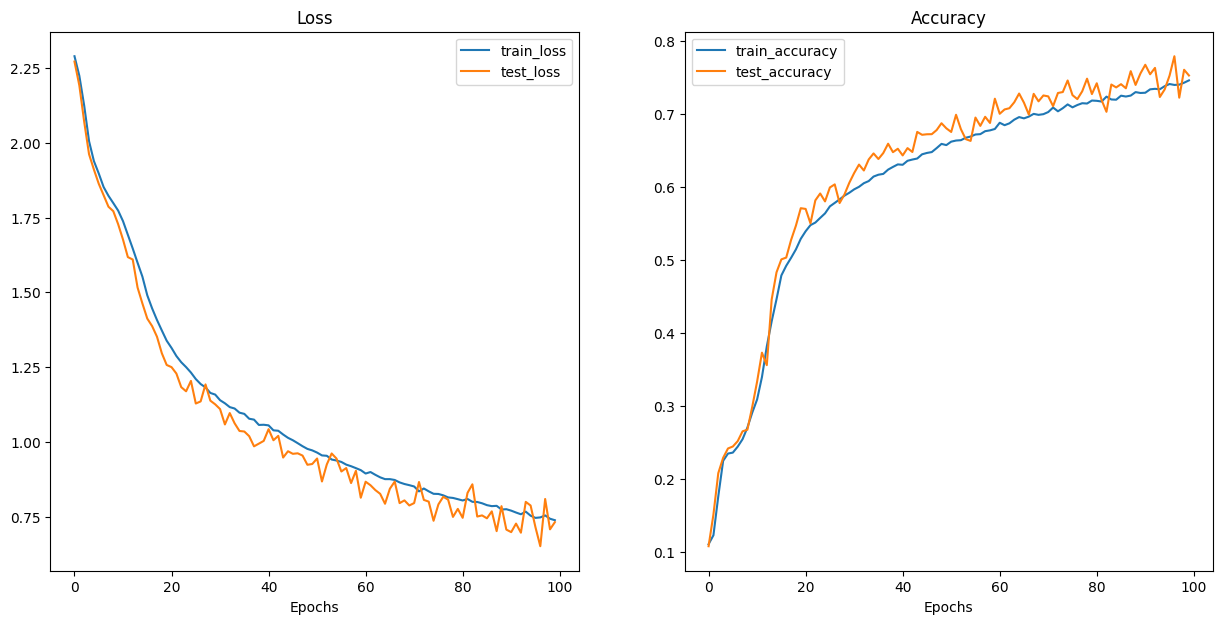

In [ ]:
results = results_df.to_dict(orient="list")
utils.plot_loss_curves(results)

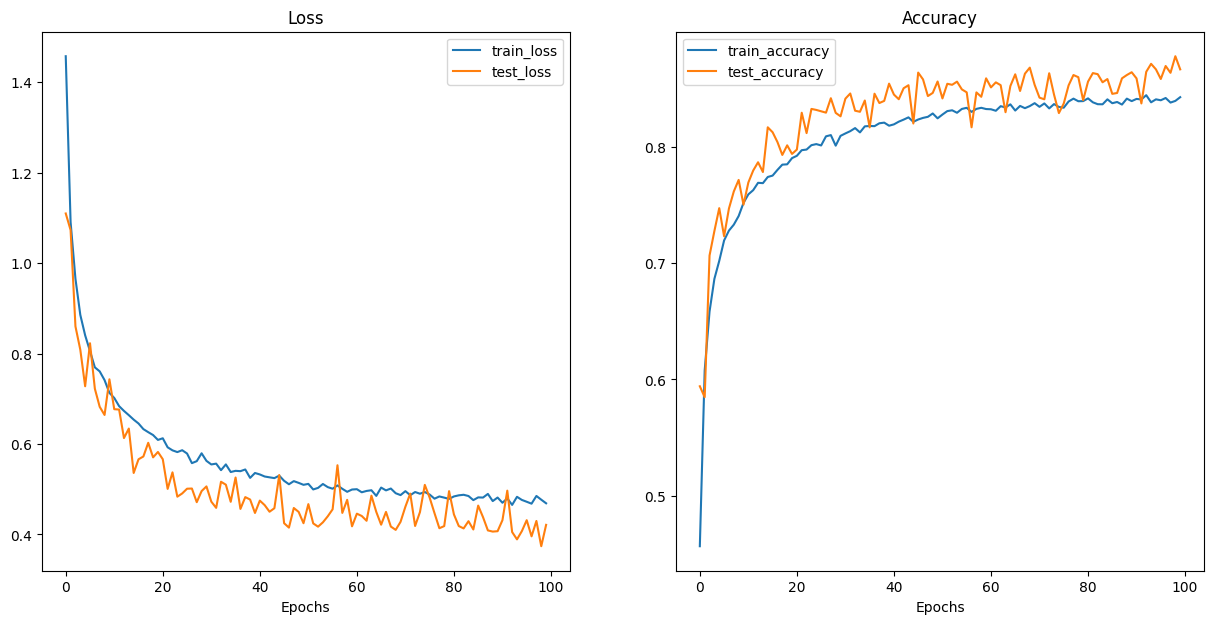

In [ ]:
results_df = pd.read_csv(save_dir+'RetrainedMODEL_1_RGB_ADAM_0_001.csv')
results1 = results_df.to_dict(orient="list")
utils.plot_loss_curves(results1)

In [ ]:
float(results['time_taken'][0])/60,float(results1['time_taken'][0])/60

(34.81287218585, 33.823802452049996)

# Wight No Transfer learnin

In [ ]:
#RetrainedRESNET50_RGB_B32_NW_EP150_S224_SDG_0_001
#RetrainedRESNET50_RGB_B32_WW_EP150_S224_SDG_0_001


results_df = pd.read_csv(save_dir+'RetrainedRESNET50_RGB_B32_NW_EP150_S224_SDG_0_001.csv')
results_NW = results_df.to_dict(orient="list")

results_df = pd.read_csv(save_dir+'RetrainedRESNET50_RGB_B32_WW_EP150_S224_SDG_0_001.csv')
results_WW = results_df.to_dict(orient="list")

In [ ]:
max(results_NW['test_acc'])

0.9426775147928994

In [ ]:
max(results_WW['test_acc'])

0.9842825443786982

# Train loss curve

In [ ]:
utils.plot_loss_curves(results)

# Random prediction

In [9]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare sample to test
      sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Predi...
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for furhter calculation
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [10]:
import random
#random.seed(42)
test_samples = []
test_labes = []
for sample, label in random.sample(list(test_dataset), k=16): #should be dataset
  test_samples.append(sample)
  test_labes.append(label)

# View the first test sampple shape
#print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labes[0]} ({class_names[test_labes[0]]})")

In [11]:
def denormalize(img, mean, std):
    # img: tensor (C, H, W)
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    img = img * std + mean  # undo normalization
    img = img.clamp(0, 1)   # keep in valid range
    return img

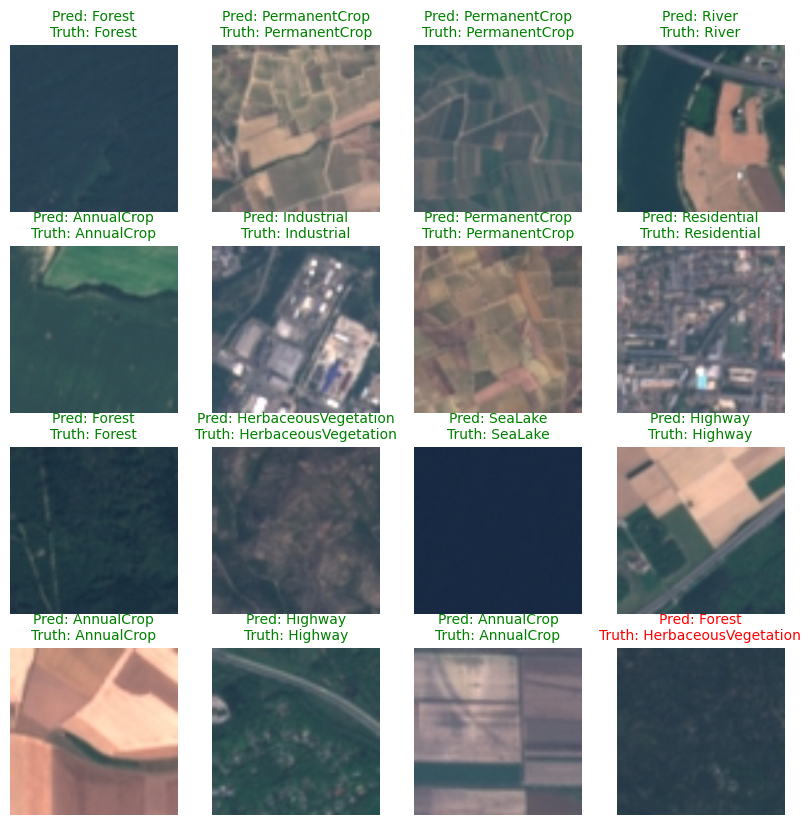

In [14]:
import random
#random.seed(42)
test_samples = []
test_labes = []
for sample, label in random.sample(list(test_dataset), k=16): #should be dataset
  test_samples.append(sample)
  test_labes.append(label)

#---------------------------------


pred_probs = make_predictions(model=model_2,
                              data = test_samples)

pred_classes = pred_probs.argmax(dim=1)

plt.figure(figsize=(10,10))
nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
  # Creating subplot
  plt.subplot(nrows, ncols, i+1)

  img = denormalize(sample, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

  # Plot the target image
  plt.imshow(img.squeeze().permute(1,2,0))

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Getting the truth label (in text from)
  truth_label = class_names[test_labes[i]]

  # Plot titple
  title = f"Pred: {pred_label}\nTruth: {truth_label}"

  # Changing titel color when it get wrong
  if pred_label == truth_label:
    plt.title(title, fontsize=10, c="g")
  else:
    plt.title(title, fontsize=10,c="r")
  plt.axis(False)


In [15]:
def denormalize(img, mean, std):
    # img: tensor (C, H, W)
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    img = img * std + mean  # undo normalization
    img = img.clamp(0, 1)   # keep in valid range
    return img

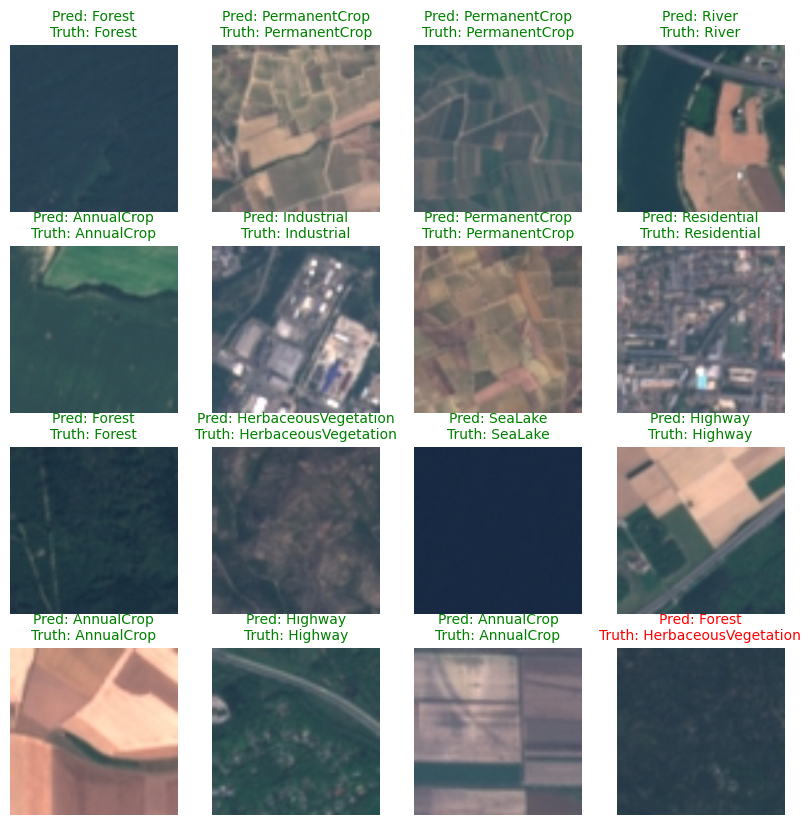

In [17]:
plt.figure(figsize=(10,10))
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    # Undo normalization for display
    img = denormalize(sample, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    plt.imshow(img.permute(1, 2, 0))  # convert C,H,W -> H,W,C

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labes[i]]
    title = f"Pred: {pred_label}\nTruth: {truth_label}"

    plt.title(title, fontsize=10, c=("g" if pred_label == truth_label else "r"))
    plt.axis(False)


# Confusion Matrix

In [ ]:
## Making prediction

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

y_preds = []
model_2.eval()
start_time = timer()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making Predictions..."):
    X,y = X.to(device), y.to(device)
    y_logit = model_2(X)
    #y_pred = torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)
    y_pred = y_logit.argmax(dim=1)
    y_preds.append(y_pred.cpu())

end_time = timer()

time_taken = end_time-start_time

print(f"Total prediction time:{end_time-start_time:.3f} seconds")

y_pred_tensor = torch.cat(y_preds)
len(y_pred_tensor)

Making Predictions...:   0%|          | 0/169 [00:00<?, ?it/s]

Total prediction time:6.104 seconds


5400

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) > 19, "mlxtend should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 19.7 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
type(test_dataset)

torch.utils.data.dataset.Subset

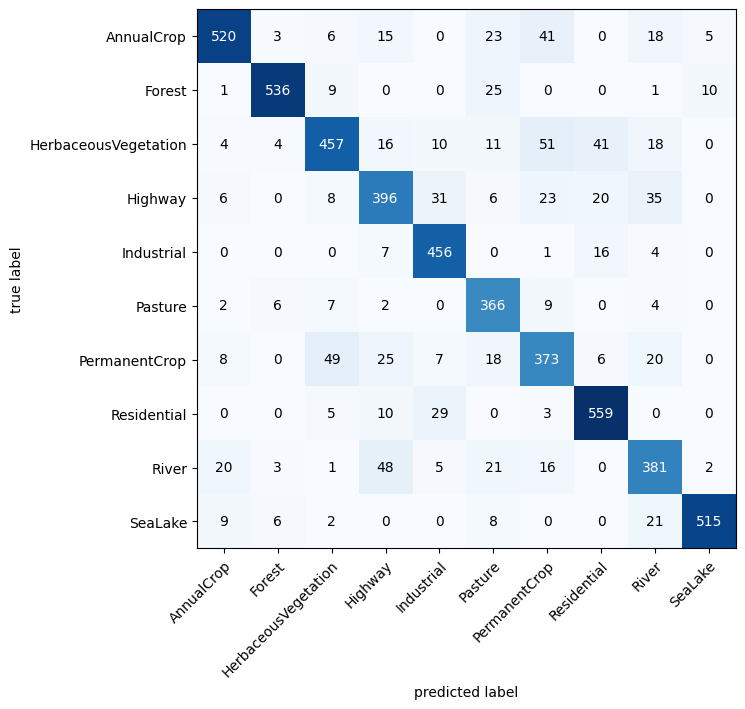

In [ ]:
from torchmetrics import ConfusionMatrix, Accuracy, Precision, Recall, F1Score
from mlxtend.plotting import  plot_confusion_matrix

# Collect targets from the test_dataset subset
test_targets = []
for _, target in test_dataset:
    test_targets.append(target)
test_targets_tensor = torch.tensor(test_targets)


confmat = ConfusionMatrix(num_classes = len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_targets_tensor)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [ ]:
acc = torchmetrics.functional.accuracy(y_pred_tensor, test_targets_tensor, task="multiclass", num_classes=10)
acc

tensor(0.8443)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(test_targets, y_pred_tensor, target_names=class_names))

                      precision    recall  f1-score   support

          AnnualCrop       0.91      0.82      0.87       631
              Forest       0.96      0.92      0.94       582
HerbaceousVegetation       0.84      0.75      0.79       612
             Highway       0.76      0.75      0.76       525
          Industrial       0.85      0.94      0.89       484
             Pasture       0.77      0.92      0.84       396
       PermanentCrop       0.72      0.74      0.73       506
         Residential       0.87      0.92      0.90       606
               River       0.76      0.77      0.76       497
             SeaLake       0.97      0.92      0.94       561

            accuracy                           0.84      5400
           macro avg       0.84      0.85      0.84      5400
        weighted avg       0.85      0.84      0.84      5400

